## Contour Approximation Quiz

In [1]:
import cv2 as cv
import numpy as np
import mods.kYaDemo as kdm
from matplotlib import pyplot as plt
import imutils

1. **Download the source code to this lesson, then open up approx_simple.py. Suppose we wanted to distinguish between circles and triangles rather than squares. What line of code would we have to change?**
- *Answer:  Line 24*  

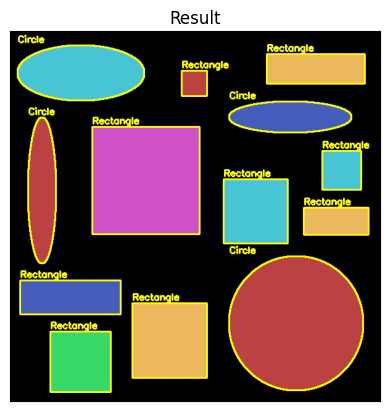

In [2]:
# load the the cirles and squares img and convert it to grayscale
img = cv.imread("C:\Git\github\kYaRick\SolutionsSandbox\kYa_lp2\src\circles_and_squares.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# find contours in the img
cnts = cv.findContours(gray.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv.arcLength(c, True)
	approx = cv.approxPolyDP(c, 0.01 * peri, True)

	# draw the outline of the contour and draw the text on the img
	cv.drawContours(img, [c], -1, (0, 255, 255), 2)
	(x, y, w, h) = cv.boundingRect(approx)

	# if the approximated contour has 4 vertices, then we are examining
	# a rectangle or circle
	if len(approx) == 4:
		cv.putText(img, "Rectangle", (x, y - 5), cv.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 255), 2)
	else:
		cv.putText(img, "Circle", (x, y - 5), cv.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 255), 2)

# show the output img
kdm.show_rgb_image(img, "Result")

2. **Find the contour of the dog silhouette in the image and approximate the contour using 1% the length of the perimeter. How many points are in the approximated contour? (dog_contour.png)**
- *Answer:  Line 17*  

In [3]:
# Load the image in grayscale
img = cv.imread("./src/dog_contour.png", cv.IMREAD_GRAYSCALE)

# Find the contours in the image
contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Approximate the contour using 1% of the perimeter length
epsilon = 0.01 * cv.arcLength(contours[0], True)
approx = cv.approxPolyDP(contours[0], epsilon, True)

# Print the number of points in the approximated contour
print("Number of points in approximated contour:", len(approx))

Number of points in approximated contour: 17


3. **How many points are in the approximated contour when we use 5% of the original perimeter? (dog_contour.png)**
- *Answer:  Line 5*  

In [4]:
# find contours in the image
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# loop over the contours
for contour in contours:
    # approximate the contour using 5% of the perimeter length
    perimeter = cv.arcLength(contour, True)
    epsilon = .05 * perimeter
    approx_contour = cv.approxPolyDP(contour, epsilon, True)
    
    # print the number of points in the approximated contour
    print(f"Number of points in approximated contour: {len(approx_contour)}")

Number of points in approximated contour: 5


4. **How many points are in the approximated contour when we use 10% of the original perimeter? (dog_contour.png)**
- *Answer:  Line 3*  

In [5]:
# find contours in the image
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# loop over the contours
for contour in contours:
    # approximate the contour using 5% of the perimeter length
    perimeter = cv.arcLength(contour, True)
    epsilon = .1 * perimeter
    approx_contour = cv.approxPolyDP(contour, epsilon, True)
    
    # print the number of points in the approximated contour
    print(f"Number of points in approximated contour: {len(approx_contour)}")

Number of points in approximated contour: 3


5. **As the percentage of perimeter increases, the number of points in the approximation:**
- *Answer:  Decreases*  

_Note_: As the percentage of perimeter increases, the number of points in the approximation typically decreases. This is because a larger percentage of the original contour is being approximated, resulting in a simpler and smoother shape with fewer points. However, if the original contour is highly irregular or complex, there may be little difference in the number of points between different percentages of perimeter.